In [5]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filepath = os.path.abspath('')
utilpath = f'{filepath}/../util/'
sys.path.append(utilpath)
data_dir = f'{filepath}/../data'

from melbourne import Melbourne

# time intense
# melbourne_sua = gpd.read_file(f'{data_dir}/prepared/geometry_melbourne_sua.shp')
# melbourne_gcc = gpd.read_file(f'{data_dir}/prepared/geometry_melbourne_gcc.shp')

melb_data = pd.read_hdf(f'{data_dir}/melb_data.h5')
melb_data['Car'] = melb_data['Car'].astype(pd.Int64Dtype())
melb_data['YearBuilt'] = melb_data['YearBuilt'].astype(pd.Int64Dtype())
melbourne = Melbourne(melb_data)
data = melbourne.raw_df

melb_data_or = pd.read_hdf(f'{data_dir}/melb_data_outliers_removed.h5')
melb_data_or['Car'] = melb_data['Car'].astype(pd.Int64Dtype())
melb_data_or['YearBuilt'] = melb_data['YearBuilt'].astype(pd.Int64Dtype())
melbourne_or = Melbourne(melb_data_or)
data_or = melbourne_or.raw_df

all_data = [data, data_or]

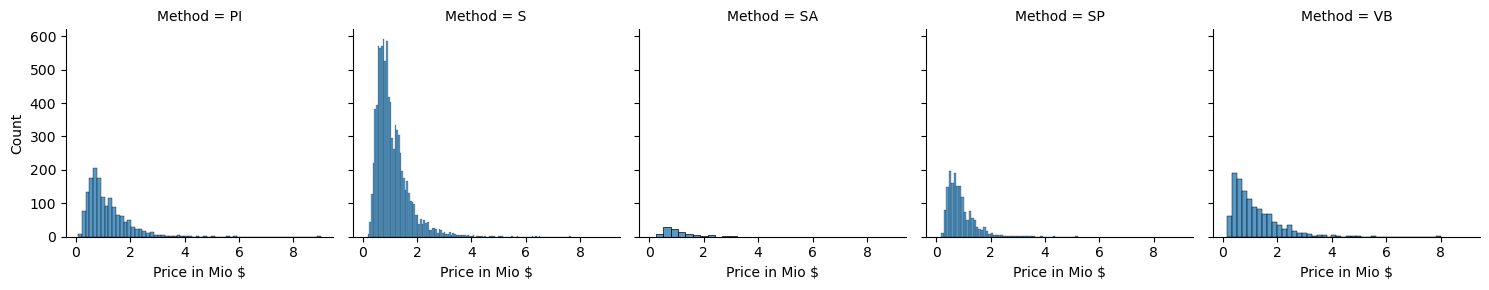

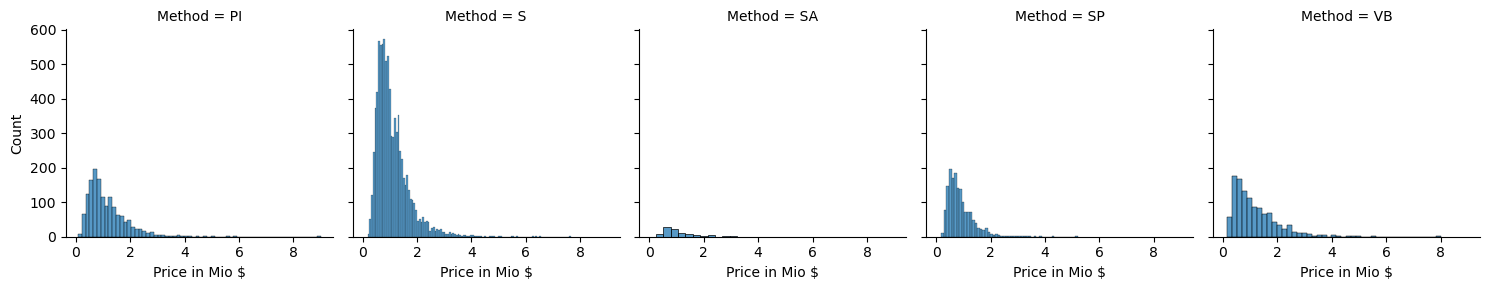

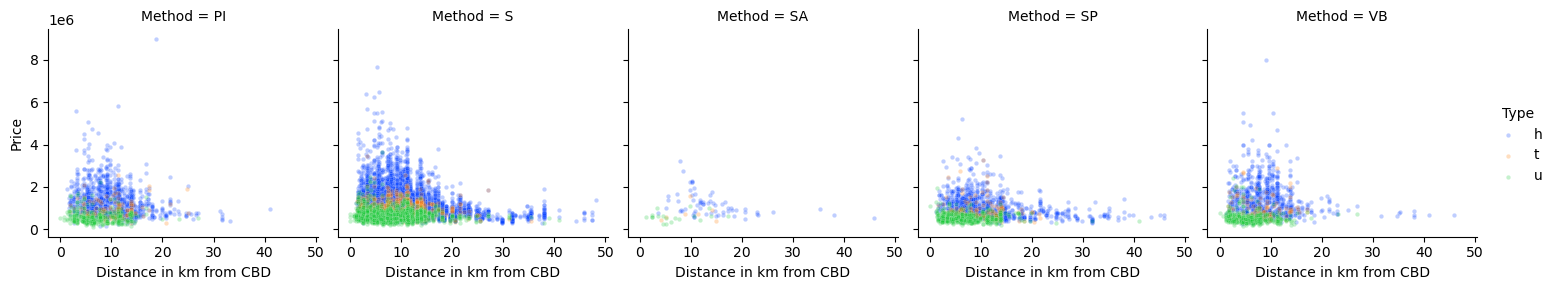

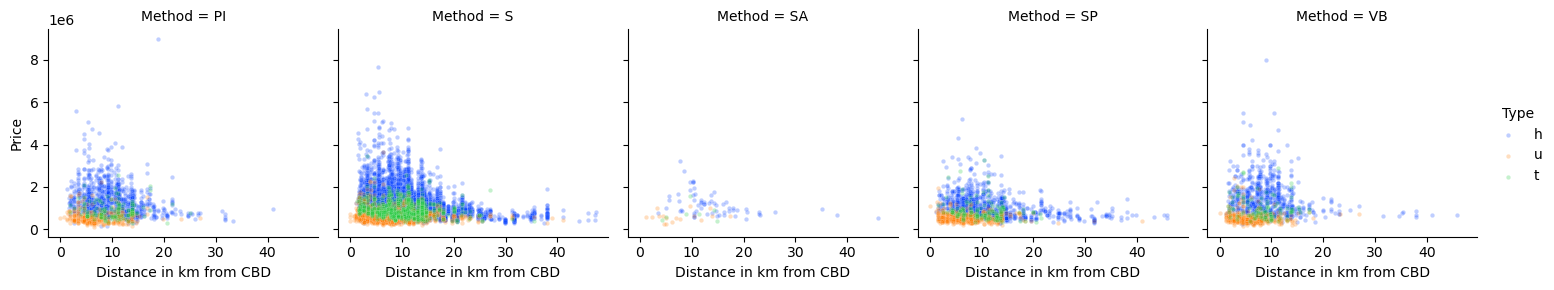

In [6]:
plt.style.use(f'{filepath}/explorerc')
col_order = sorted(data['Method'].unique())

from matplotlib.ticker import FuncFormatter

for df in all_data:
    g = sns.FacetGrid(data=df, col='Method', col_order=col_order)
    g.map(sns.histplot, 'Price')
    for ax in g.axes[0]:
        ax.xaxis.set_major_formatter(FuncFormatter(lambda t, _: f'{t/1e6:,.0f}'))
        ax.set_xlabel('Price in Mio \\$')

for df in all_data:
    g = sns.FacetGrid(data=df, col='Method', col_order=col_order, hue='Type', palette=sns.color_palette('bright'))
    g.map(sns.scatterplot, 'Distance', 'Price', s=10, alpha=.25)
    for ax in g.axes[0]:
        ax.set_xlabel('Distance in km from CBD')
    g.add_legend()

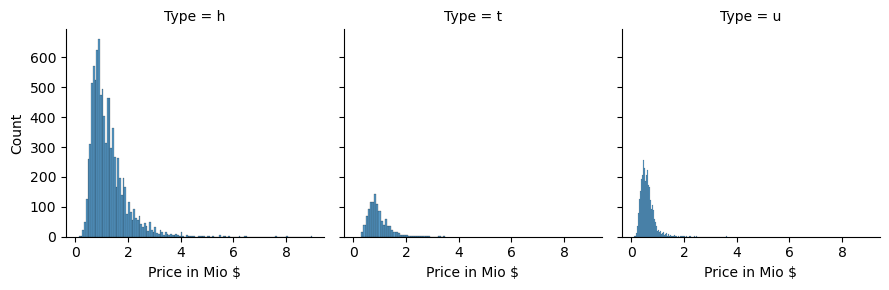

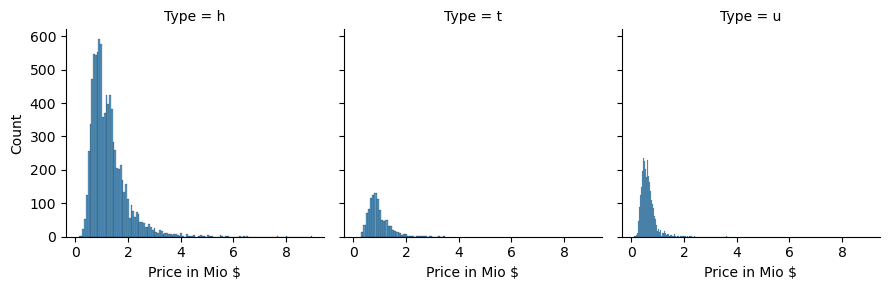

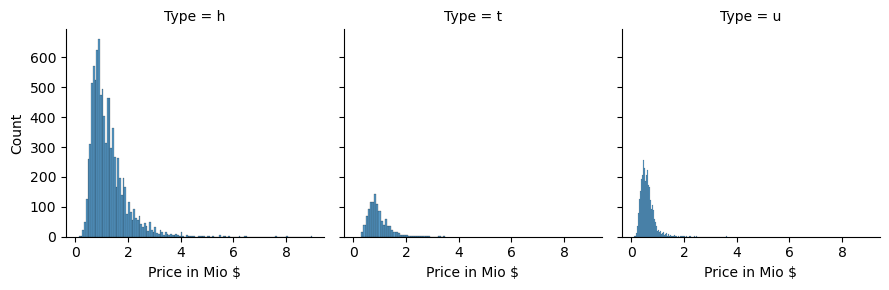

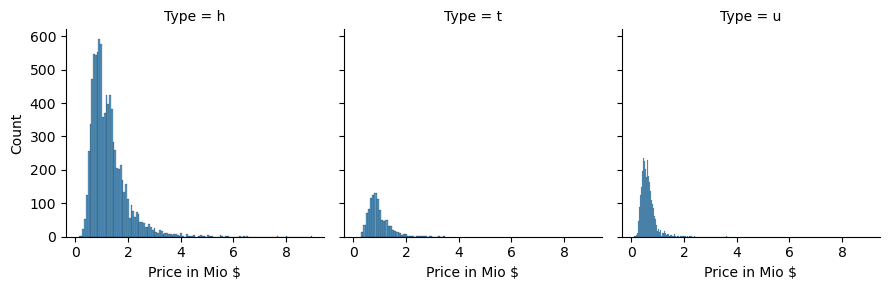

In [7]:
col_order = sorted(data['Type'].unique())

for df in all_data:
    g = sns.FacetGrid(data=df, col='Type', col_order=col_order)
    g.map(sns.histplot, 'Price')
    for ax in g.axes[0]:
        ax.xaxis.set_major_formatter(FuncFormatter(lambda t, _: f'{t/1e6:,.0f}'))
        ax.set_xlabel('Price in Mio \\$')

for df in all_data:
    g = sns.FacetGrid(data=df, col='Type', col_order=col_order)
    g.map(sns.histplot, 'Price')
    for ax in g.axes[0]:
        ax.xaxis.set_major_formatter(FuncFormatter(lambda t, _: f'{t/1e6:,.0f}'))
        ax.set_xlabel('Price in Mio \\$')

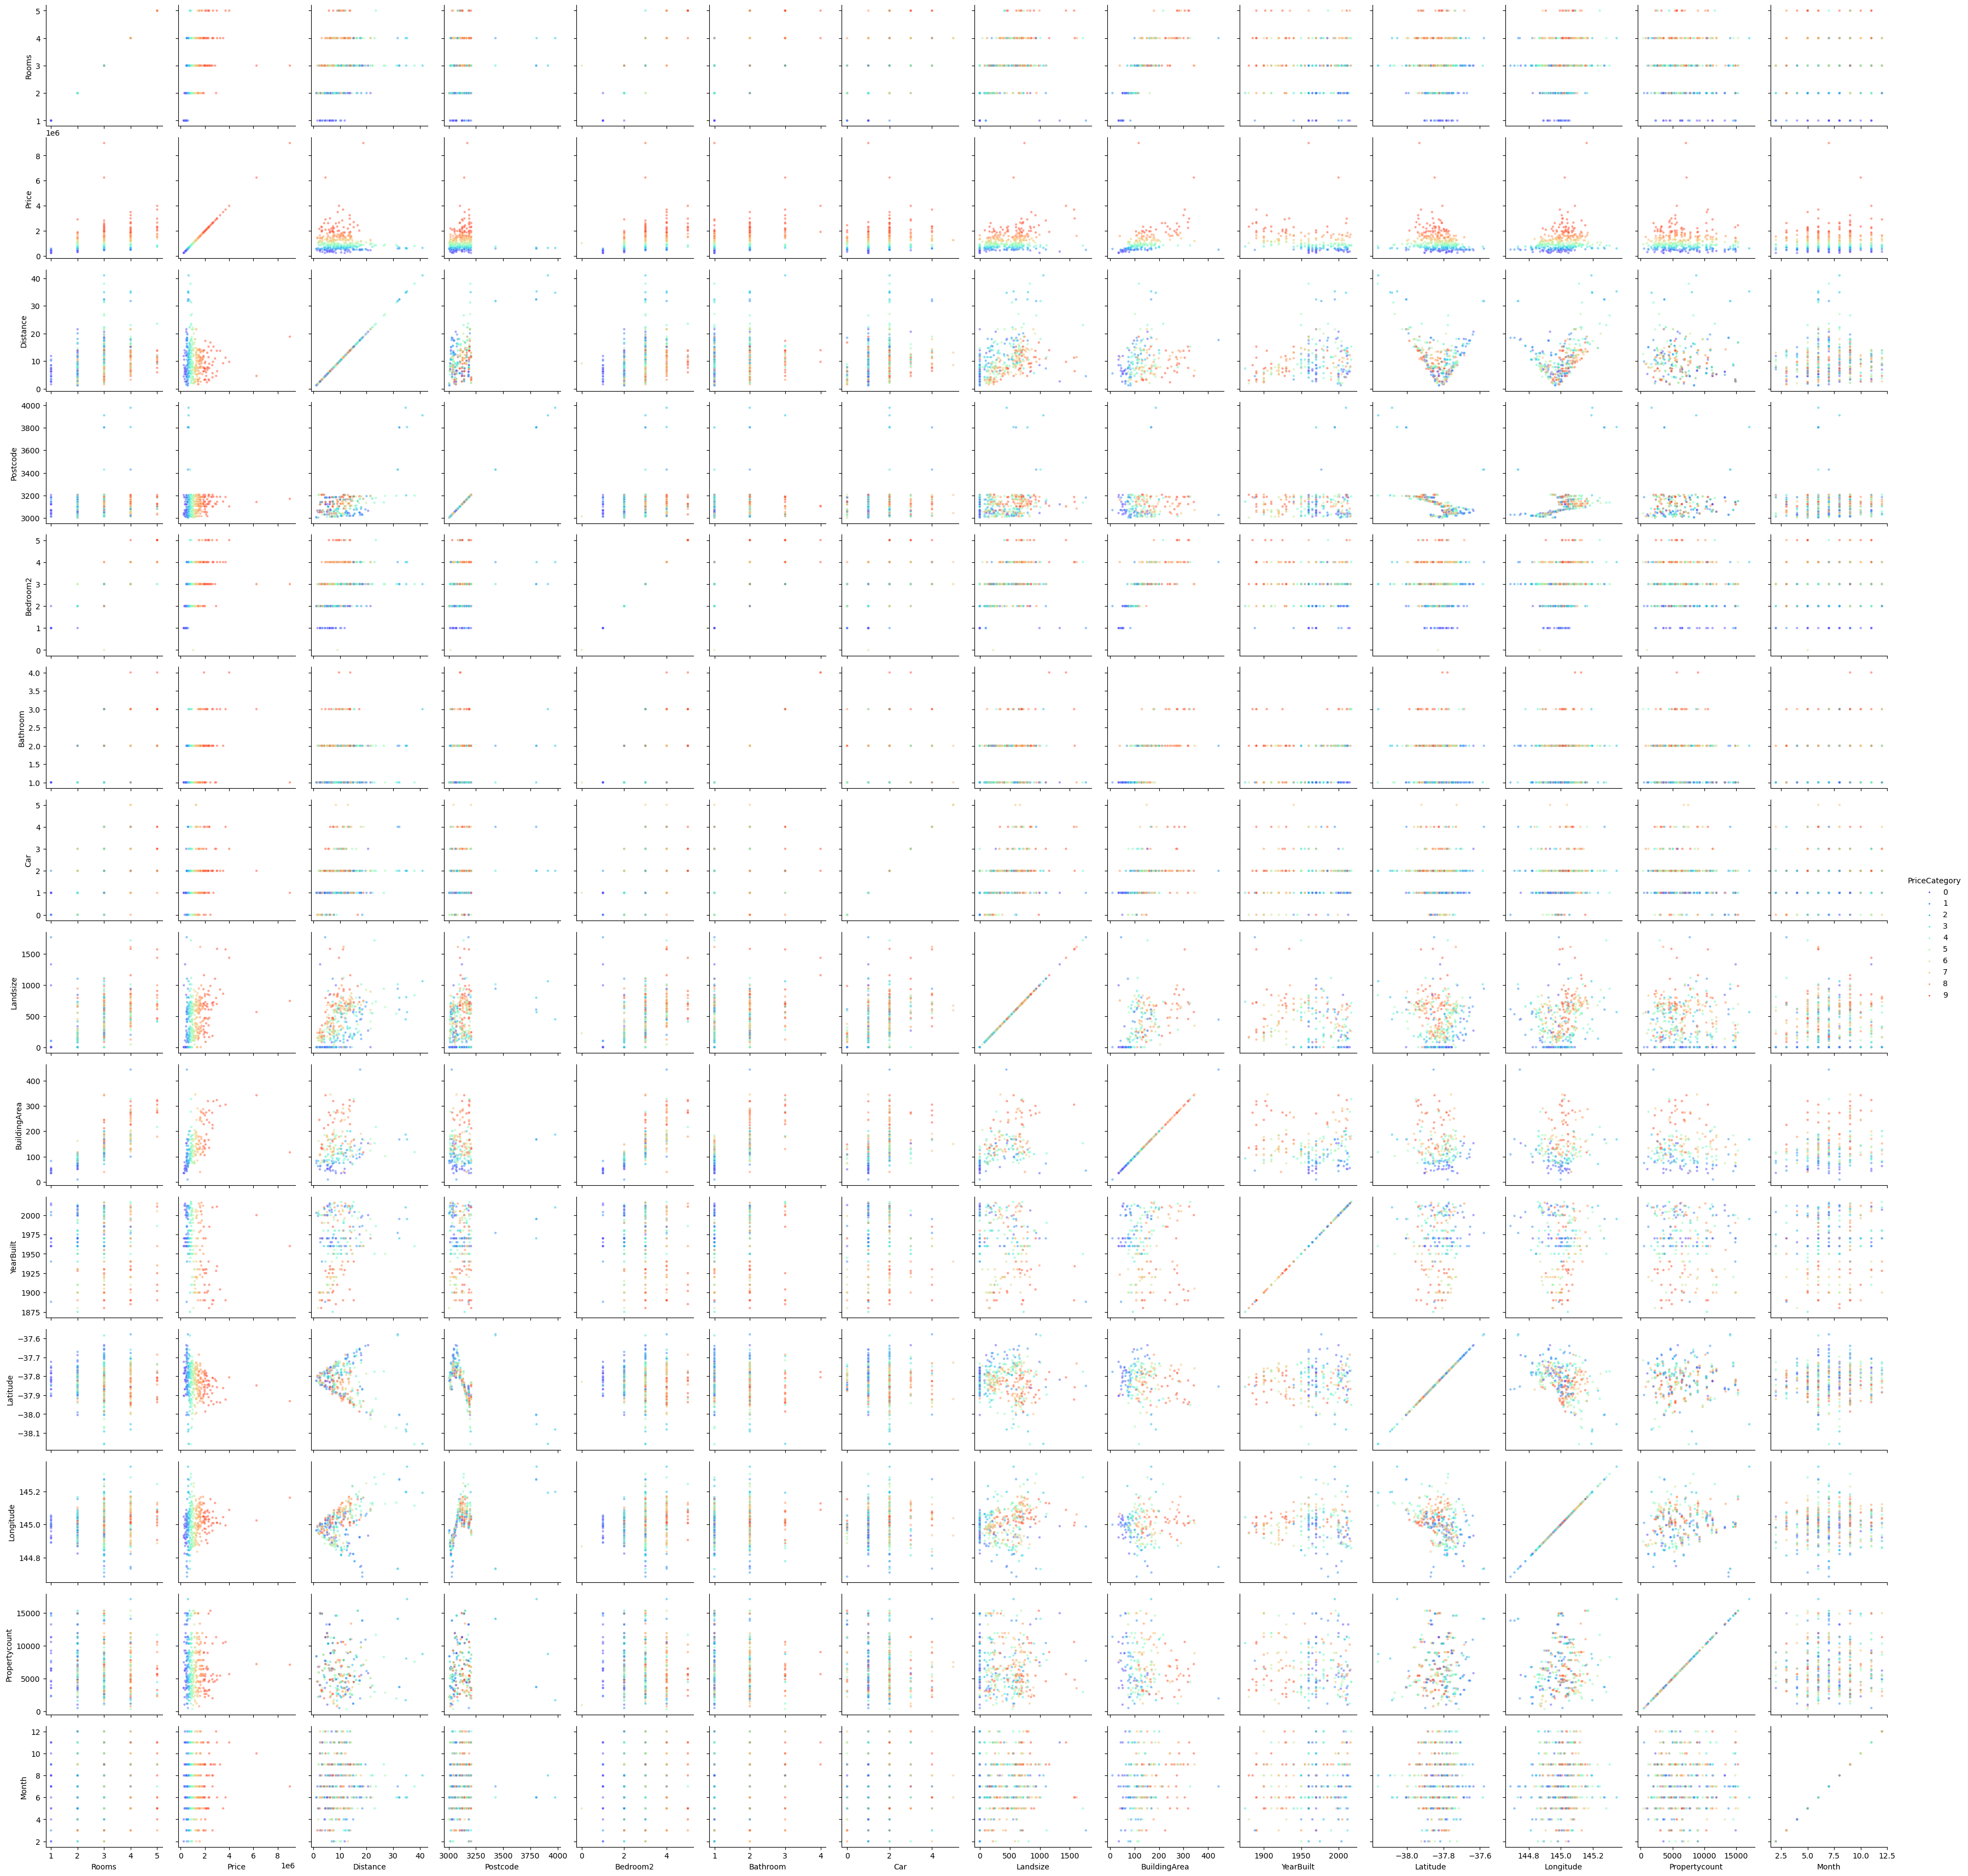

In [8]:
n_price_cats = len(melbourne_or.raw_df.PriceCategory.unique())
p = sns.PairGrid(
    data=melbourne_or.raw_df.sample(400), 
    palette=sns.color_palette('rainbow', n_colors=n_price_cats),
    hue='PriceCategory', 
)
p.map(sns.scatterplot, s=10, alpha=.5)
p.add_legend()

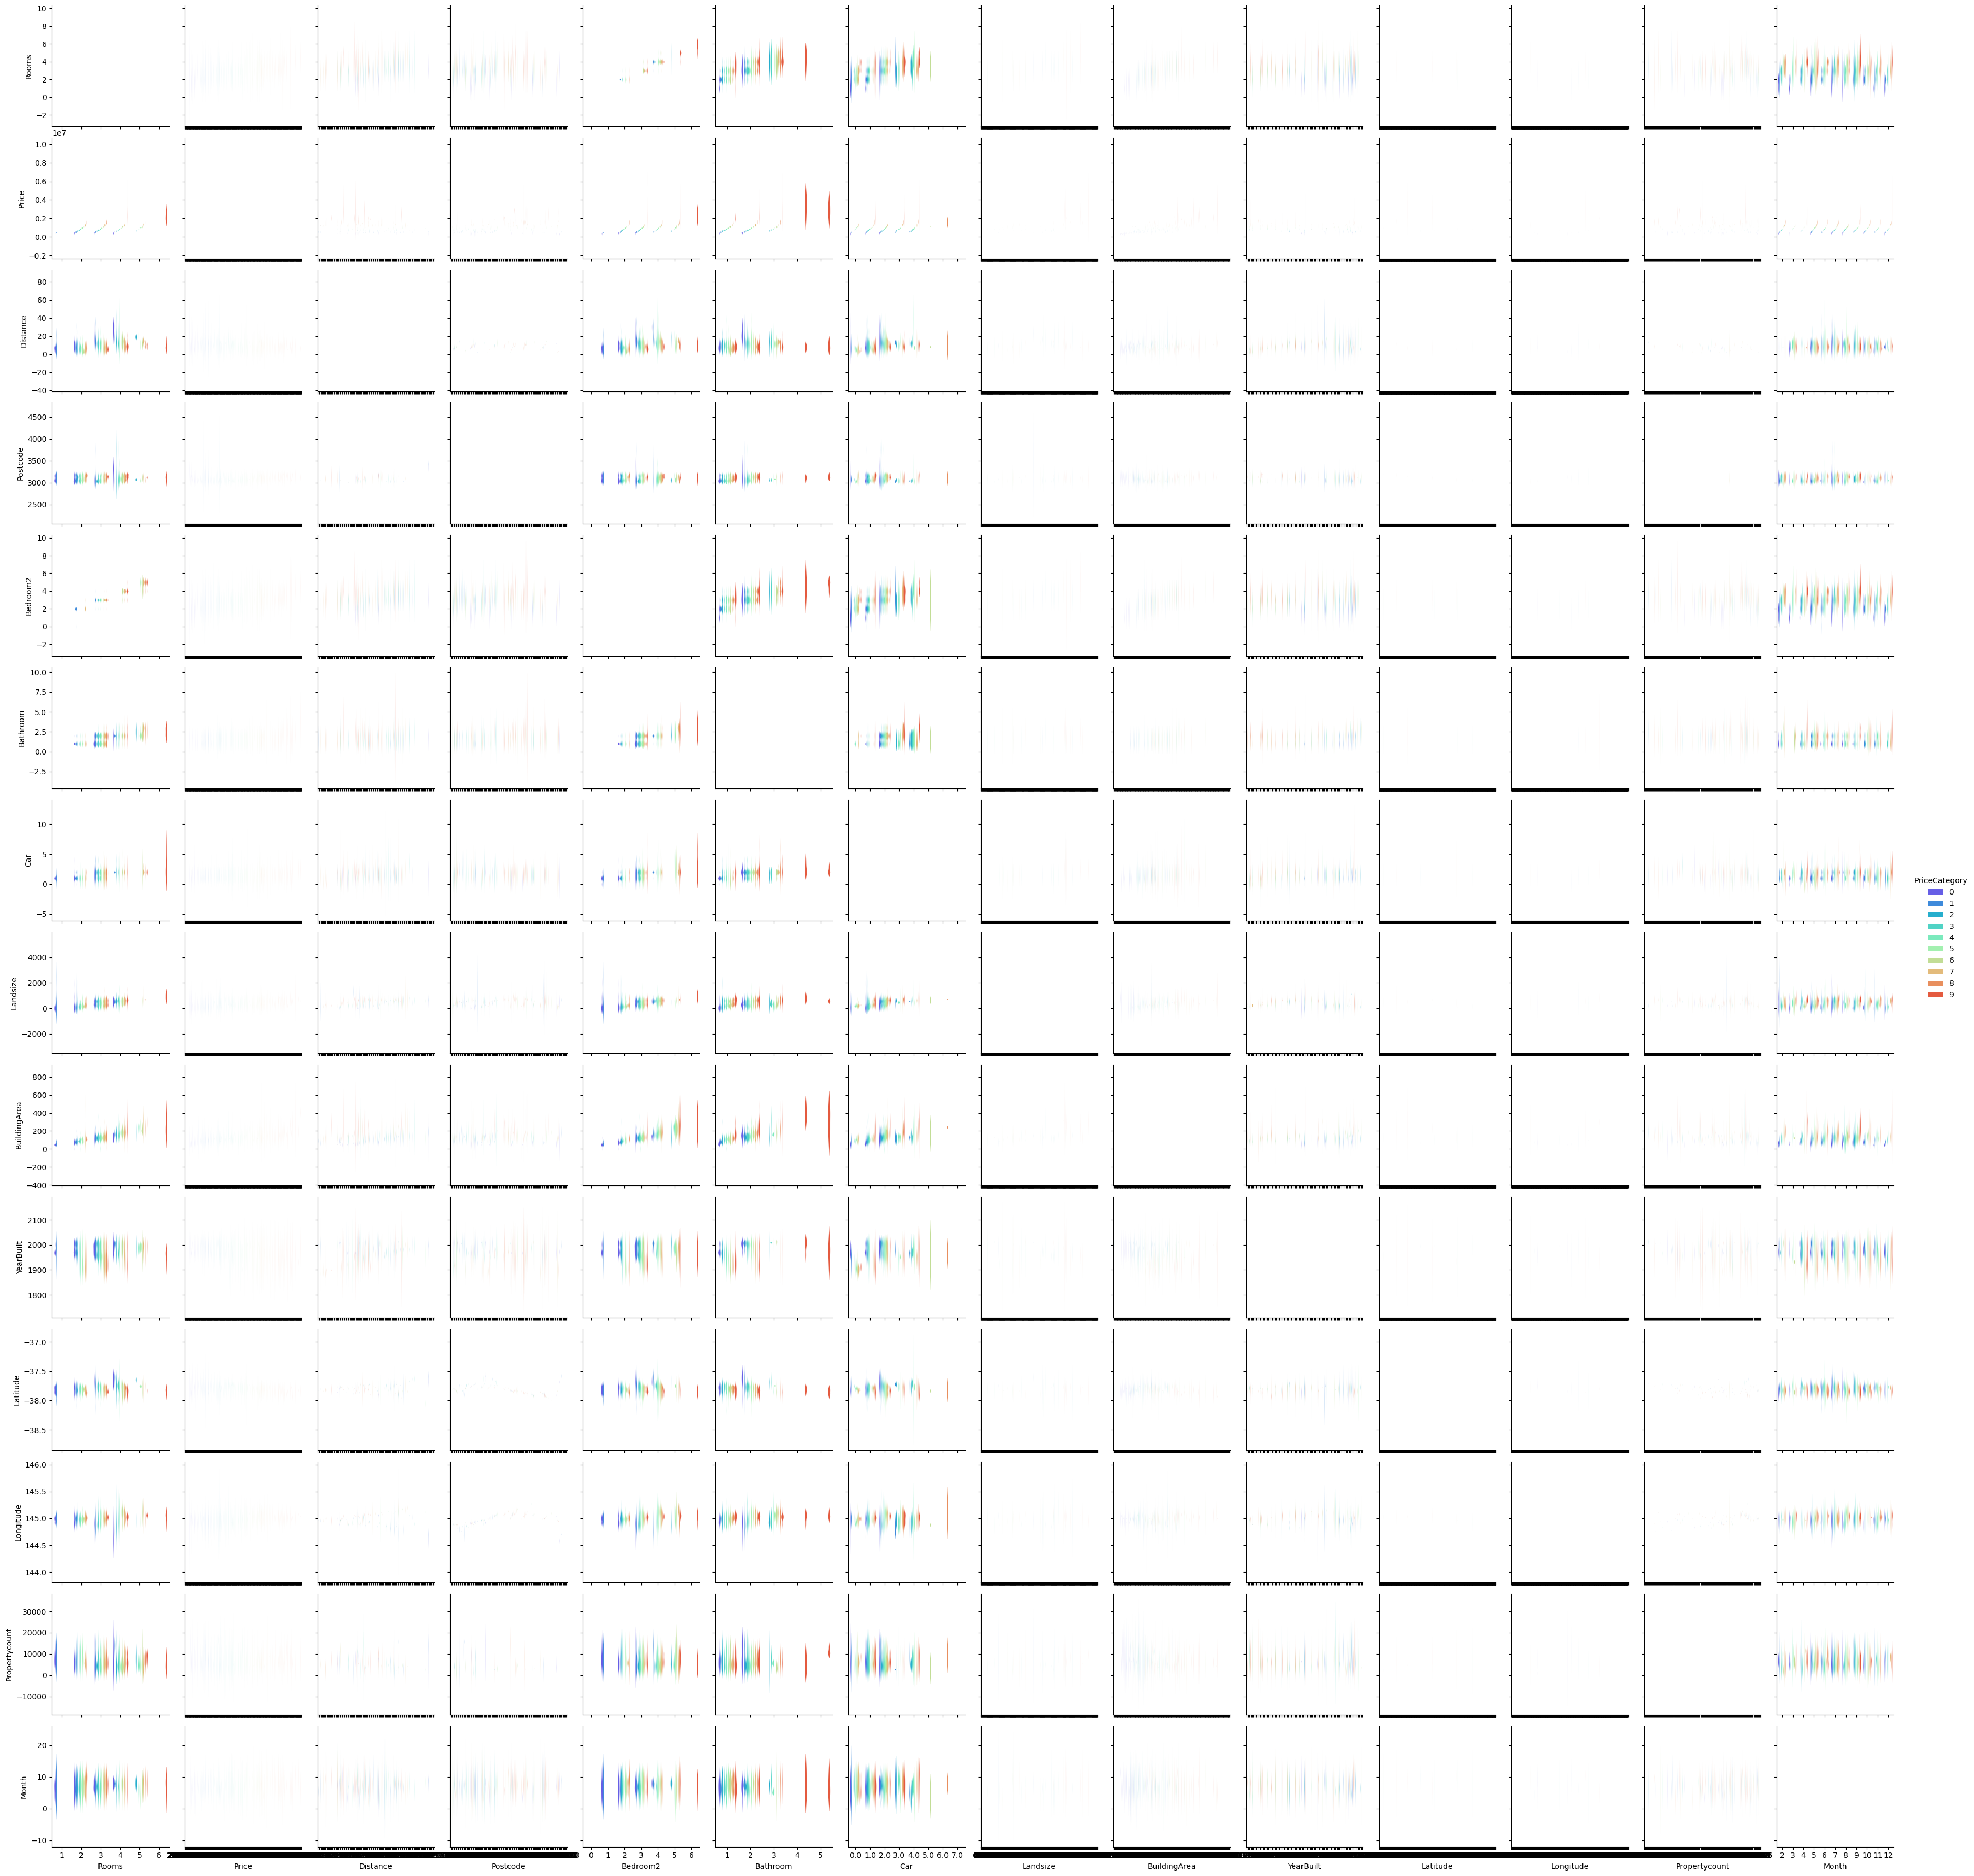

In [5]:
n_price_cats = len(melbourne_or.raw_df.PriceCategory.unique())
p = sns.PairGrid(
    data=melbourne_or.raw_df.sample(1000), 
    palette=sns.color_palette('rainbow', n_colors=n_price_cats),
    hue='PriceCategory', 
)
p.map(sns.violinplot, linewidth=0)
p.add_legend()

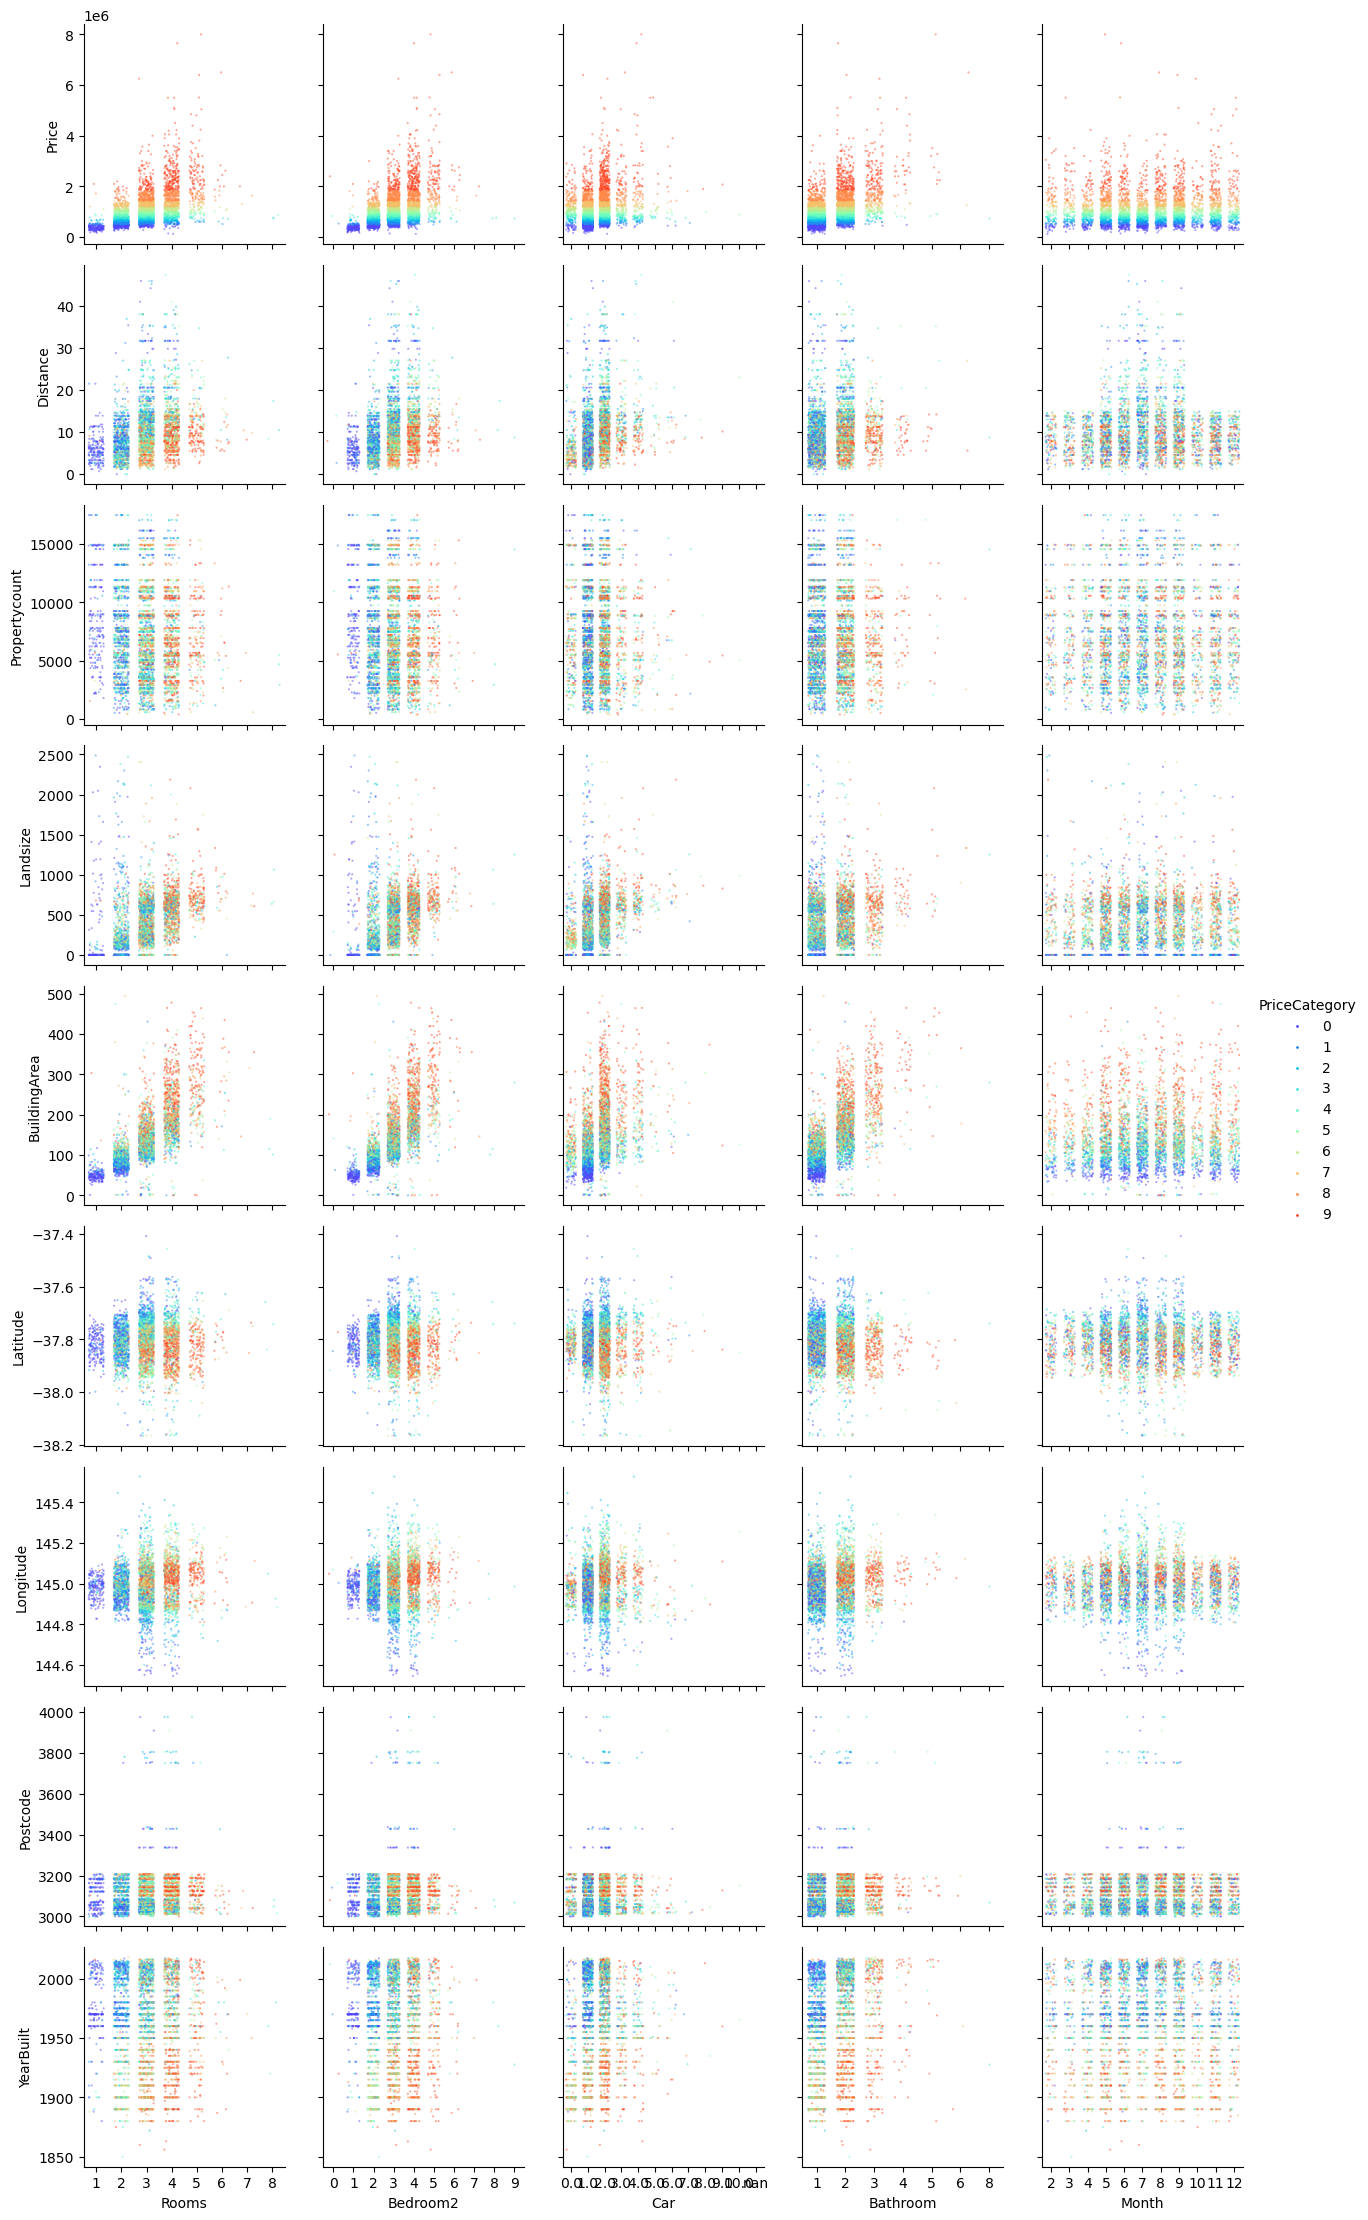

In [6]:
n_price_cats = len(melbourne_or.raw_df.PriceCategory.unique())
x_vars = [
    'Rooms',
    'Bedroom2',
    'Car',
    'Bathroom',
    'Month',
]
y_vars = [
    'Price',
    'Distance',
    'Propertycount',
    'Landsize',
    'BuildingArea',
    'Latitude',
    'Longitude',
    'Postcode',
    'YearBuilt',
]
p = sns.PairGrid(
    data=melbourne_or.raw_df.sample(4000), 
    x_vars=x_vars, 
    y_vars=y_vars, 
    palette=sns.color_palette('rainbow', n_colors=n_price_cats),
    hue='PriceCategory', 
)
p.map(sns.stripplot, size=1.5, alpha=.5, jitter=.3)
p.add_legend()

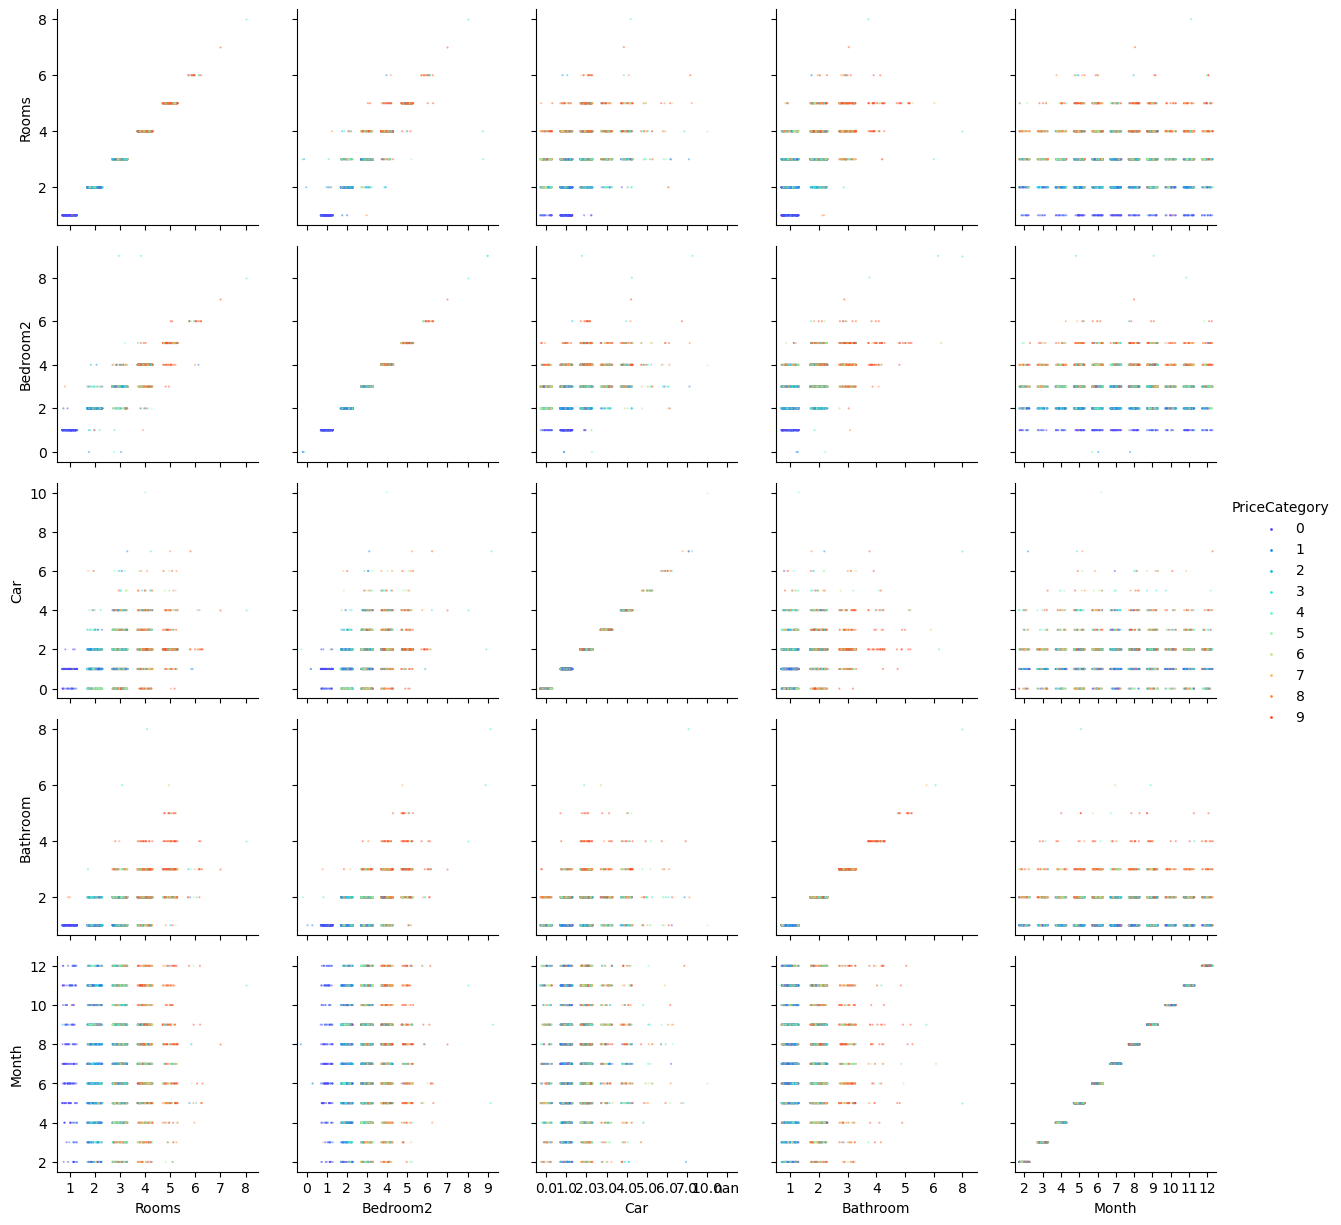

In [7]:
n_price_cats = len(melbourne_or.raw_df.PriceCategory.unique())
features = [
    'Rooms',
    'Bedroom2',
    'Car',
    'Bathroom',
    'Month',
    'PriceCategory'
]
p = sns.PairGrid(
    data=melbourne_or.raw_df.loc[:, features].sample(4000), 
    palette=sns.color_palette('rainbow', n_colors=n_price_cats),
    hue='PriceCategory', 
)
p.map(sns.stripplot, size=1.5, alpha=.5, jitter=.3)
p.add_legend()

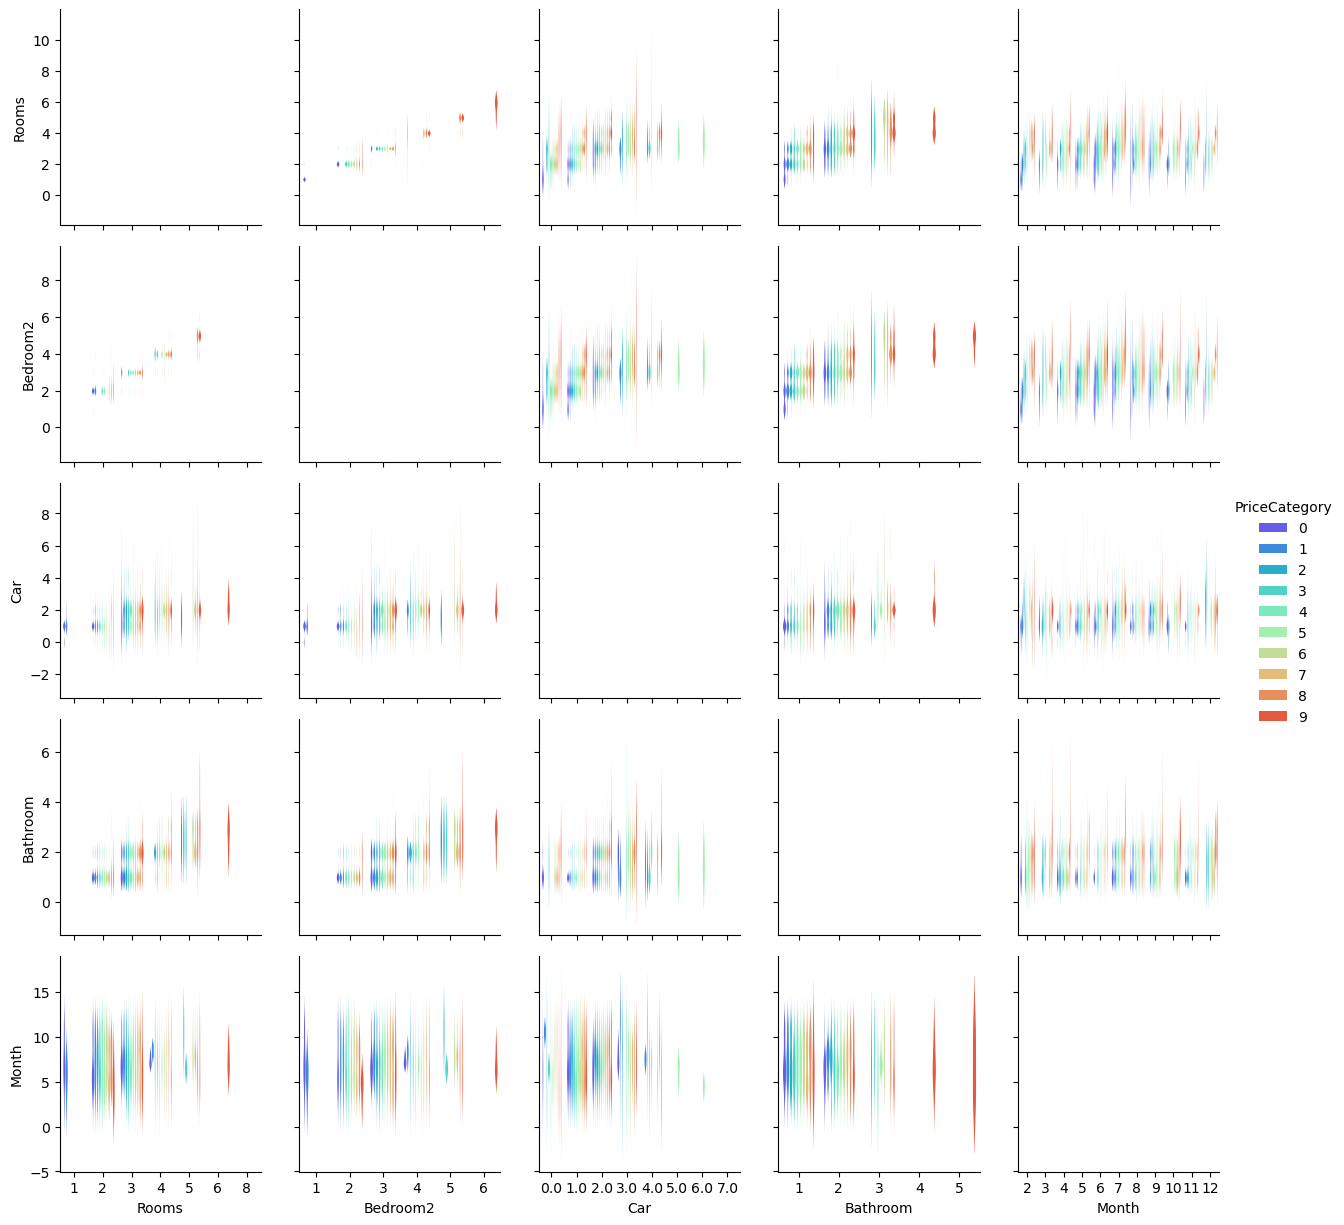

In [8]:
n_price_cats = len(melbourne_or.raw_df.PriceCategory.unique())
features = [
    'Rooms',
    'Bedroom2',
    'Car',
    'Bathroom',
    'Month',
    'PriceCategory'
]
p = sns.PairGrid(
    data=melbourne_or.raw_df.loc[:, features].sample(1000), 
    palette=sns.color_palette('rainbow', n_colors=n_price_cats),
    hue='PriceCategory', 
)
p.map(sns.violinplot, linewidth=0)
p.add_legend()